In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_dir = '/content/drive/My Drive/Dataset'

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Parameters
img_width, img_height = 150, 150  # Adjust based on your dataset
batch_size = 32

# Assuming each folder name in the dataset directory is a label
num_classes = len(os.listdir(dataset_dir))  # Number of cuisine categories

# Data Preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # 20% data for validation

train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

# CNN Model Architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the Model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the Model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,  # Adjust as needed
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)

# Save the Model
model.save('cuisine_detector_model.h5')


Found 979 images belonging to 4 classes.
Found 242 images belonging to 4 classes.


Epoch 1/10
30/30 [==============================] - 185s 6s/step - loss: 1.6820 - accuracy: 0.2724 - val_loss: 1.3648 - val_accuracy: 0.3170
Epoch 2/10
30/30 [==============================] - 43s 1s/step - loss: 1.2511 - accuracy: 0.4393 - val_loss: 1.3315 - val_accuracy: 0.4018
Epoch 3/10
30/30 [==============================] - 43s 1s/step - loss: 1.1473 - accuracy: 0.4942 - val_loss: 1.3122 - val_accuracy: 0.3438
Epoch 4/10
30/30 [==============================] - 42s 1s/step - loss: 0.9871 - accuracy: 0.5839 - val_loss: 1.3493 - val_accuracy: 0.3616
Epoch 5/10
30/30 [==============================] - 43s 1s/step - loss: 0.8463 - accuracy: 0.6610 - val_loss: 1.3456 - val_accuracy: 0.3884
Epoch 6/10
30/30 [==============================] - 42s 1s/step - loss: 0.6906 - accuracy: 0.7307 - val_loss: 1.4704 - val_accuracy: 0.3839
Epoch 7/10
30/30 [==============================] - 41s 1s/step - loss: 0.5528 - accuracy: 0.8004 - val_loss: 1.6440 - val_accuracy: 0.4018
Epoch 8/10
30/30 [=

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import ipywidgets as widgets
from IPython.display import display
import io
from PIL import Image
import tensorflow as tf
import numpy as np

# Load the trained model
model = tf.keras.models.load_model('cuisine_detector_model.h5')

def load_and_preprocess_image(image, target_size=(150, 150)):
    img = Image.open(io.BytesIO(image))
    img = img.resize(target_size)
    img_array = np.array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

def predict_cuisine(image, model):
    img_array = load_and_preprocess_image(image)
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction, axis=1)
    return predicted_class_index

# Function to handle the upload and prediction
def on_upload_change(change):
    if not upload_button.value:
        print("Please upload an image.")
        return

    # Get the uploaded file
    uploaded_file = next(iter(upload_button.value.values()))
    image_content = uploaded_file['content']

    # Predict the cuisine
    predicted_class_index = predict_cuisine(image_content, model)
    print("Predicted Class Index:", predicted_class_index)

# Create an upload button
upload_button = widgets.FileUpload(
    accept='image/*',  # Accept only image files
    multiple=False  # Allow only single file upload
)
display(upload_button)

# Observe changes in the upload button
upload_button.observe(on_upload_change, names='_counter')


FileUpload(value={}, accept='image/*', description='Upload')

1/1 [==============================] - 0s 119ms/step
Predicted Class Index: [1]


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import ipywidgets as widgets
from IPython.display import display
import io
from PIL import Image
import numpy as np

# Parameters
img_width, img_height = 150, 150  # Adjust based on your dataset
batch_size = 32

# Data Preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # 20% data for validation

train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

# Get the class indices
class_indices = train_generator.class_indices
# Create a dictionary for mapping indices to class labels
label_map = {v: k for k, v in class_indices.items()}

# CNN Model Architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(class_indices), activation='softmax'))

# Compile the Model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# # Train the Model
# model.fit(
#     train_generator,
#     steps_per_epoch=train_generator.samples // batch_size,
#     epochs=10,  # Adjust as needed
#     validation_data=validation_generator,
#     validation_steps=validation_generator.samples // batch_size)

# # Save the Model
# model.save('cuisine_detector_model.h5')

Found 979 images belonging to 4 classes.
Found 242 images belonging to 4 classes.


FileUpload(value={}, accept='image/*', description='Upload')

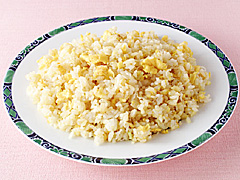

1/1 [==============================] - 0s 98ms/step
Predicted Cuisine: Chinese


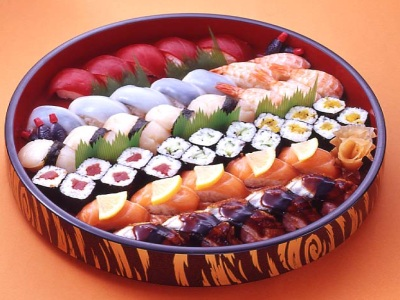

1/1 [==============================] - 0s 60ms/step
Predicted Cuisine: Japanese


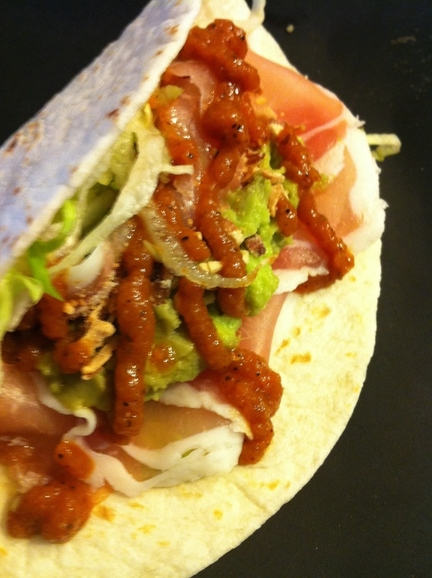

1/1 [==============================] - 0s 87ms/step
Predicted Cuisine: Mexican


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import ipywidgets as widgets
from IPython.display import display
import io
from PIL import Image
import numpy as np

# Load the pre-trained model
model_path = 'cuisine_detector_model.h5'  # Update this path
model = tf.keras.models.load_model(model_path)


# Function to load and preprocess image
def load_and_preprocess_image(image, target_size=(150, 150)):
    img = Image.open(io.BytesIO(image))
    img = img.resize(target_size)
    img_array = np.array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Function to predict the cuisine
def predict_cuisine(image, model):
    img_array = load_and_preprocess_image(image)
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction, axis=1)
    predicted_class_label = label_map[predicted_class_index[0]]
    return predicted_class_label

# Function to handle the upload and prediction
def on_upload_change(change):
    if not upload_button.value:
        print("Please upload an image.")
        return

    # Get the uploaded file
    uploaded_file = next(iter(upload_button.value.values()))
    image_content = uploaded_file['content']

    # Display the uploaded image
    display(IPImage(data=image_content))

    # Predict the cuisine
    predicted_class_label = predict_cuisine(image_content, model)
    print("Predicted Cuisine:", predicted_class_label)

# Create an upload button
upload_button = widgets.FileUpload(
    accept='image/*',  # Accept only image files
    multiple=False  # Allow only single file upload
)
display(upload_button)

# Observe changes in the upload button
upload_button.observe(on_upload_change, names='_counter')